In [1]:
import numpy as np
from core import initialize_bodies
from quadtree import Node
from quadtree import Quadtree
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# initialize bodies with random masses, positions, and velocities over set range
# bodies[n] = Body(mass, position [x, y], velocity [vx, vy])
bodies = initialize_bodies(5, mass_range = [1, 10], position_range = [-32, 32], velocity_range = [-5, 5])
positions = [body.position for body in bodies]
print(positions)
# printing sample values
# print(bodies[0].mass)
# print(bodies[0].position)
# print(bodies[0].velocity)
# print(len(bodies))

# last resort below. Had to format it like this bc I had no idea how to utilize it otherwise. feel free to make it work with the class itself
# formatbodies = [[body.mass for body in bodies], [[body.position[0] for body in bodies], [body.position[1] for body in bodies]], [body.velocity for body in bodies]]

# print([body.position for body in bodies])

QuadTest = Quadtree(bodies, 64)


for i in range(len(QuadTest.nodelist)):
    print( 'points ' + str(QuadTest.nodelist[i].points) + ' nodeposition ' +str(QuadTest.nodelist[i].nodeposition) + 'size ' +str(QuadTest.nodelist[i].size) )

[array([1.89456373, 8.66922366]), array([-9.35539414, 24.44982901]), array([ 7.21686116, -4.86973123]), array([26.32471606, 20.60832955]), array([-17.09546526, -19.11113066])]
points [0, 1, 2, 3, 4] nodeposition [0, 0]size 0
points [1] nodeposition [-32.0, 32.0]size 1
points [0, 3] nodeposition [32.0, 32.0]size 1
points [4] nodeposition [-32.0, -32.0]size 1
points [2] nodeposition [32.0, -32.0]size 1
points [] nodeposition [16.0, 48.0]size 2
points [] nodeposition [48.0, 48.0]size 2
points [0, 3] nodeposition [16.0, 16.0]size 2
points [] nodeposition [48.0, 16.0]size 2
points [] nodeposition [8.0, 24.0]size 3
points [3] nodeposition [24.0, 24.0]size 3
points [0] nodeposition [8.0, 8.0]size 3
points [] nodeposition [24.0, 8.0]size 3


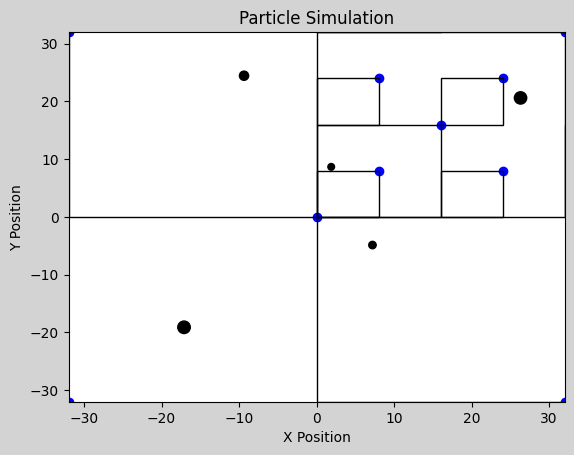

In [2]:
# Example animation using matplotlib

# %matplotlib widget

# Time step for position updates
dt = 0.1

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(-32, 32) # X-axis limits
ax.set_ylim(-32, 32) # Y-axis limits
ax.set_title("Particle Simulation", color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("white")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies], # Initial x-coordinate of bodies
    [body.position[1] for body in bodies], # Initial y-coordinate of bodies
    s=[body.mass * 10 for body in bodies], # Size of bodies proportional to mass
    c="black",  # Color of bodies
)

pos1 = []
pos2 = []
for i in range(len(QuadTest.nodelist)):
    pos1.append(QuadTest.nodelist[i].nodeposition[0])
    pos2.append(QuadTest.nodelist[i].nodeposition[1])

scat2 = ax.scatter(pos1, pos2, c='blue')

for i in range(len(QuadTest.nodelist)):
    formatcoords = [QuadTest.nodelist[i].nodeposition[0]-(64/2**(QuadTest.nodelist[i].size)), QuadTest.nodelist[i].nodeposition[1]-(64/2**(QuadTest.nodelist[i].size))]
    
    Rect = patches.Rectangle(formatcoords, (64/2**(QuadTest.nodelist[i].size)), (64/2**(QuadTest.nodelist[i].size)), ec = 'black', fill =False)
    plt.gca().add_patch(Rect)
# Update function for animation
# def update_position(frame):

#     updated_positions = [] # Initialize as a list

#     for body in bodies:
#         body.position += body.velocity * dt  # Update positions
#         updated_positions.append(body.position)  # Collect new positions
#     scat.set_offsets(updated_positions)  # Update scatter plot
    
#     return scat

# # Create the animation
# ani = animation.FuncAnimation(
#     fig=fig,
#     func=update_position,
#     frames=range(50),  # Number of frames
#     interval=50,  # Time between frames in milliseconds
#     repeat=False,  # Stop after the last frame
# )

# # Show the plot
plt.show()

In [3]:
# import numpy as np
# from quadtree import Node
# from quadtree import Quadtree



# # Testing Quadtree
